In [1]:
from circuits import *
from qiskit.circuit.random import random_circuit
from qiskit import QuantumCircuit
from qiskit.converters import circuit_to_dag, dag_to_circuit
from trans import *
import argparse
args = argparse.Namespace()
args.circuit = "qft"     # random, qv, qft, vqc_aa, iqp
args.nqubits= 30
args.high=4
args.low=26
args.depth=100
# qc=[generate_circuit(args,False)]
qc=trans(args)
# print(qc.count_ops())
def create_separated_circuit(n_low, n_high,depth):
    """
    Generate a quantum circuit with separated low and high order qubits.
    
    Args:
        n_low (int): Number of low-order qubits
        n_high (int): Number of high-order qubits
    
    Returns:
        QuantumCircuit: Circuit with separated low/high qubit operations
    """
    n_total = n_low + n_high
    circuit = QuantumCircuit(n_total)
    for j in range(depth):
        # Apply gates on low-order qubits (q[0] to q[n_low-1])
        for i in range(n_low):
            circuit.h(i)  # Apply Hadamard to low-order qubits
            if i < n_low - 1:
                circuit.cx(i, i + 1)  # CX within low-order qubits
        
        # Apply gates on high-order qubits (q[n_low] to q[n_total-1])
        for i in range(n_low, n_total):
            circuit.x(i)  # Apply X gate to high-order qubits
            if i < n_total - 1:
                circuit.cz(i, i + 1)  # CZ within high-order qubits
        
        # Apply allowed cross-boundary gates (high-order as control, low-order as target)
        for i in range(n_low, n_total):
            circuit.cx(i, 0)  # High-order qubit controls low-order qubit q[0]
    return circuit

# qc=create_separated_circuit(28,2,5)
# print(qc.draw(output='text', fold=-1))

# qc=random_circuit(num_qubits=30, depth=300, seed=46,max_operands=1)
# basis=['cx','cy', 'cz', 'ccx', 'cswap','rx','ry','rz']
# # qc=transpile(qc, basis_gates=basis, optimization_level=0)

# qc = QuantumCircuit(30)
# # 每层都对每个 qubit 施加一个 H 门
# for _ in range(60):
#     for q in range(30):
#         qc.h(q)
qc=transpile(qc, optimization_level=0)

from collections import OrderedDict
merged = OrderedDict()

for e in qc:
    print(e.draw(output='text', fold=-1))
    # print(e.depth())
    print(e.count_ops())
    dict2=e.count_ops()
    for key in set(merged) | set(dict2):  # 并集
        merged[key] = merged.get(key, 0) + dict2.get(key, 0)
print(merged)

# print(qc.draw(output='text', fold=-1))
# print(qc.depth())
# print(qc.count_ops())




#################################################################################################### 238
OrderedDict([('rz', 1365), ('cx', 915), ('rx', 30)])
10 sub
2 sub no merge
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [ ]:
from qiskit.circuit.random import random_circuit
from qiskit import QuantumCircuit
from qiskit.converters import circuit_to_dag, dag_to_circuit
from numpy import pi
qc=QuantumCircuit(30)
num_qubits=30
# for i in range(1):
#     qc.h(i) 
#     for j in range(i + 1, num_qubits):
#         control = i
#         target=j
#         angle =  pi / (2 ** (j-i))
#         qc.cp(angle, control, target)  # cu1 → cp in Qiskit
#         if control==0 and target==num_qubits-3:
#             qc.h(i+1) 
#             break
for i in range(1,num_qubits):
    if i!=1:
        qc.h(num_qubits-1-i) 
    for j in range(i + 1, num_qubits):
        control = num_qubits-1-i
        target=num_qubits-1-j
        # angle =  pi / (2 ** (j-i))
        qc.cy(control, target)  # cu1 → cp in Qiskit

qc=QuantumCircuit(30)
for i in range(num_qubits - 1, -1, -1):
    target = num_qubits - 1 - i
    qc.h(target) 
    for j in range(i - 1, -1, -1):
        control = num_qubits - 1 - j
        k = i - j + 1
        angle = 2 * pi / (2 ** k)
        qc.cp(angle, control, target)  # cu1 → cp in Qiskit

print(qc.draw(output='text', fold=-1))

      ┌───┐                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [5]:

import time
from qiskit_aer import AerSimulator
simulator = AerSimulator(method='statevector', device='GPU', cuStateVec_enable=True)
simulator.set_options(
    blocking_enable=True,
    blocking_qubits=28,
)
qc.save_statevector()
start=time.time()
job = simulator.run(qc)
result = job.result()
sv_data = result.get_statevector().data

end = time.time()

print(f'低阶模拟总共耗时: {end - start:.4f} 秒')

print(sv_data)



低阶模拟总共耗时: 51.6323 秒
[3.05175781e-05+0.j 1.22070313e-04+0.j 1.22070313e-04+0.j ...
 3.05175781e-05+0.j 3.05175781e-05+0.j 3.05175781e-05+0.j]


In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import time

num_qubits = 30

qc = QuantumCircuit(num_qubits)
qc.swap(0, num_qubits-1)  # 只加一个 swap 门
qc.save_statevector()

simulator = AerSimulator(method='statevector')
compiled = qc#transpile(qc, simulator, optimization_level=0)

start = time.perf_counter()
simulator.run(compiled).result()
end = time.perf_counter()

print(f"单个 swap 门模拟耗时: {end - start:.6f} 秒")

单个 swap 门模拟耗时: 1.838571 秒


In [ ]:
from qiskit import QuantumCircuit
from circuits import *
import json
import argparse
from swap_trans import *

args = argparse.Namespace()
args.circuit = "Random"     # random, qv, qft, vqc_aa, iqp
args.nqubits= 30
args.high=2
args.low=args.nqubits-2
args.depth=50




# def create_separated_circuit(n_low, n_high,depth):
#     """
#     Generate a quantum circuit with separated low and high order qubits.
    
#     Args:
#         n_low (int): Number of low-order qubits
#         n_high (int): Number of high-order qubits
    
#     Returns:
#         QuantumCircuit: Circuit with separated low/high qubit operations
#     """
#     n_total = n_low + n_high
#     circuit = QuantumCircuit(n_total)
#     for j in range(depth):
#         # Apply gates on low-order qubits (q[0] to q[n_low-1])
#         for i in range(n_low):
#             circuit.h(i)  # Apply Hadamard to low-order qubits
#             if i < n_low - 1:
#                 circuit.cx(i, i + 1)  # CX within low-order qubits
        
#         # Apply gates on high-order qubits (q[n_low] to q[n_total-1])
#         for i in range(n_low, n_total):
#             circuit.x(i)  # Apply X gate to high-order qubits
#             if i < n_total - 1:
#                 circuit.cz(i, i + 1)  # CZ within high-order qubits
        
#         # Apply allowed cross-boundary gates (high-order as control, low-order as target)
#         for i in range(n_low, n_total):
#             circuit.cx(i, 0)  # High-order qubit controls low-order qubit q[0]
#     return circuit
# qc=create_separated_circuit(28,2,25)

qc=trans(args)

qc=generate_circuit(args,False)

print(qc.draw(output='text', fold=-1))

# gate_sequence = []
# for instruction, qargs, cargs in qc.data:
#     gate = {
#         "name": instruction.name,
#         "qubits": [qc.find_bit(q).index for q in qargs],  # ✅ 修复此处
#         "params": [float(p) for p in instruction.params]  # 确保 JSON 可序列化
#     }
#     gate_sequence.append(gate)
# with open("./my/circuit.json", "w") as f:
#     json.dump(gate_sequence, f, indent=2)

# print("✅ 电路成功导出为 my/circuit.json")
# print(qc.count_ops())


import time
start=time.time()
simulator = AerSimulator(method='statevector', device='GPU', cuStateVec_enable=True)
simulator.set_options(
    blocking_enable=True,
    blocking_qubits=27,
)
qc.save_statevector()
job = simulator.run(qc)
result = job.result()
sv_data = result.get_statevector().data

end = time.time()

print(f'低阶模拟总共耗时: {end - start:.4f} 秒')

print(sv_data)


#################################################################################################### 369
#################################################################################################### 369
global phase: 2.9841
          ┌───┐       ┌─────────┐       ┌───┐     ┌─────────────┐     ┌───┐                                                                                                                ┌───┐          ┌───┐     ┌──────────────┐     ┌───┐                        ┌───┐      ┌──────────┐      ┌───┐       ┌────────────┐     ┌───┐           ┌───┐     ┌────────────┐    ┌───┐      ┌─────────┐      ┌───┐      ┌────────────┐    ┌───┐          ┌───┐     ┌────────────┐    ┌───┐         ┌───┐      ┌──────────┐      ┌───┐      ┌──────────┐     ┌───┐      ┌─────────┐  ┌───┐ ┌─────────┐       ┌───┐                                                                                                                                                                                   

In [ ]:
from qiskit import QuantumCircuit,transpile
from circuits import *
import json
import argparse
from trans import *


args = argparse.Namespace()
args.circuit = "Random"     # random, qv, qft, vqc_aa, iqp
args.nqubits= 30
args.high=2
args.low=args.nqubits-args.high
args.depth=150

qc_list=trans(args)
qc=QuantumCircuit(args.nqubits)

for e in qc_list:
    qc=qc.compose(e)

# qc=generate_circuit(args,False)

# print(qc.depth())
# print(qc.draw(output='text', fold=-1))

simulator = AerSimulator(method='statevector', device='GPU', cuStateVec_enable=True)
simulator.set_options(
    blocking_enable=True,
    blocking_qubits=args.low,
)

qc=transpile(qc, simulator, optimization_level=0)
# print(qc.depth())
# print(qc.draw(output='text', fold=-1))

qc.save_statevector()
import time
start=time.time()
job = simulator.run(qc)
result = job.result()
sv_data = result.get_statevector().data

end = time.time()

print(f'低阶模拟总共耗时: {end - start:.4f} 秒')

print(sv_data)


#################################################################################################### 1102
1102
1102
          ┌───┐       ┌─────────┐       ┌───┐     ┌─────────────┐     ┌───┐                                                                                                               ┌───┐          ┌───┐     ┌──────────────┐     ┌───┐                       ┌───┐    ┌──────────┐      ┌───┐       ┌────────────┐     ┌───┐           ┌───┐     ┌────────────┐    ┌───┐      ┌─────────┐      ┌───┐      ┌────────────┐    ┌───┐         ┌───┐     ┌────────────┐    ┌───┐         ┌───┐      ┌──────────┐      ┌───┐      ┌──────────┐     ┌───┐      ┌─────────┐      ┌───┐      ┌─────────┐       ┌───┐                                                                                                                                                                                                                                                       ┌───┐      ┌──────────┐     ┌───┐      ┌───

In [15]:
import numpy as np
import time

def generate_tensor_product(n):
    """生成一个 2^n × 2^n 的复数矩阵，来源是 n 个 2×2 复数矩阵的张量积"""
    np.random.seed()  # 避免所有矩阵一样
    result = np.random.rand(2, 2) + 1j * np.random.rand(2, 2)
    for _ in range(n - 1):
        mat = np.random.rand(2, 2) + 1j * np.random.rand(2, 2)
        result = np.kron(result, mat)
    return result

def test_tensor_chain_multiplication(num_matrices=260, n=5):
    """
    生成 num_matrices 个 2^n x 2^n 的复数矩阵，每个由 n 个 2×2 张量积构成；
    然后顺序相乘，并计时整个过程。
    """
    dim = 2 ** n
    print(f"正在测试 {num_matrices} 个 {dim}×{dim} 矩阵（由 {n} 个 2×2 张量积构成）链式乘法...")

    start_time = time.time()

    matrices = [generate_tensor_product(n) for _ in range(num_matrices)]

    result = matrices[0]
    for i in range(1, num_matrices):
        result = np.dot(result, matrices[i])

    end_time = time.time()
    elapsed = end_time - start_time
    print(f"总耗时（构造 + 乘法）：{elapsed:.6f} 秒")

# 示例：构造并相乘 260 个 32×32 矩阵（即 n = 5）
test_tensor_chain_multiplication(num_matrices=260, n=4)


正在测试 260 个 16×16 矩阵（由 4 个 2×2 张量积构成）链式乘法...
总耗时（构造 + 乘法）：0.097702 秒


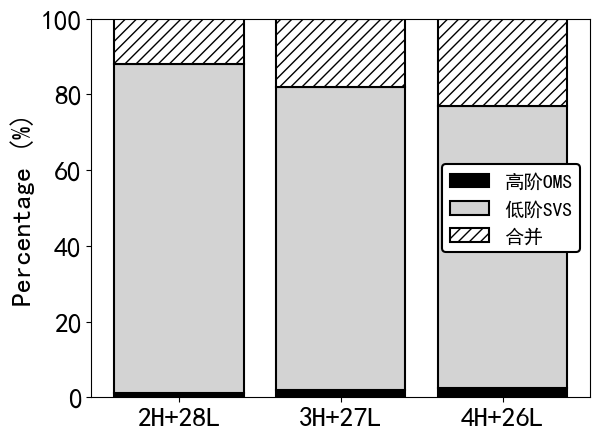

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'SimHei'  # 或 'Microsoft YaHei'、'Arial Unicode MS'
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号
# 原始数据
labels = ['2H+28L', '3H+27L', '4H+26L']
gemm = np.array([0.5, 1, 1.75])
svsim = np.array([36, 42.4, 53.4])
merge = np.array([5, 9.6, 16.6])

# 总和
total = gemm + svsim + merge

# 转换为百分比
gemm_pct = gemm / total * 100
svsim_pct = svsim / total * 100
merge_pct = merge / total * 100

# 设置字体大小
fs=20
plt.rcParams.update({
    'font.size': fs,
    'axes.titlesize': fs,
    'axes.labelsize': fs,
    'xtick.labelsize': fs,
    'ytick.labelsize': fs,
    'legend.fontsize': 14
})

# 画图
x = np.arange(len(labels))
# fig, ax = plt.subplots(figsize=(10, 7))
fig, ax = plt.subplots()

# GEMM：黑色填充
ax.bar(x, gemm_pct, label='高阶OMS', color='black', edgecolor='black', linewidth=1.5)

# SVSim：白色填充 + 黑色边框
ax.bar(x, svsim_pct, bottom=gemm_pct, label='低阶SVS', color='lightgray', edgecolor='black', linewidth=1.5)

# Merge：斜线填充
bottom_merge = gemm_pct + svsim_pct
ax.bar(x, merge_pct, bottom=bottom_merge, label='合并', color='white', edgecolor='black', hatch='///', linewidth=1.5)

# 设置图形属性
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Percentage (%)')
ax.set_ylim(0, 100)

# 去除网格线
ax.grid(False)

# 不透明图例
legend=ax.legend(loc='center right', framealpha=1.0,edgecolor='black')
legend.get_frame().set_linewidth(1.5)

plt.tight_layout()
plt.show()
